In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
from utils import cluster_mean

## 聚类输入

In [3]:
# total=numpy.load(r'C:\Users\e-wel\Documents\Python Scripts\60天统计\间隔_5min.npy',allow_pickle=True).item()
info=numpy.load(r'C:\Users\e-wel\Documents\Python Scripts\60天统计\路段信息_简略.npy',allow_pickle=True).item()

In [4]:
mean_mat=numpy.load(r'C:\Users\e-wel\Documents\Python Scripts\DeepPF\log_7\mean_mat.npy',allow_pickle=True).item()

In [5]:
mean_mat_slot_20={}
for seg in mean_mat:
    new_record=[numpy.around(numpy.mean(mean_mat[seg][i*4:(i+1)*4]),2) for i in range(len(mean_mat[5])//4)]
    mean_mat_slot_20[seg]=new_record

In [11]:
mean_mat_slot_20_norm={}
for seg in mean_mat_slot_20:
    max_val=max(mean_mat_slot_20[seg])
    min_val=min(mean_mat_slot_20[seg])
    min_arr=numpy.array([min_val for i in range(len(mean_mat[5])//4)])
    mean_mat_slot_20_norm[seg]=list(numpy.around((mean_mat_slot_20[seg]-min_arr)/(max_val-min_val),2))

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
for seg in [5, 3, 43,44,46]:
    plt.plot([8+i for i in range(14)],mean_mat_slot_20_norm[seg],label=str(seg))
plt.legend()
plt.show()

In [11]:
for i in range(len(mean_mat[5])//12):
    tmp=mean_mat_slot_20_norm_arr[:,i]
    if numpy.sum(numpy.where(tmp<0.5,1,0))==9:
        print(i+8,i)


13


In [ ]:
print(list(mean_mat_slot_20_norm.values()))

In [17]:
import time

In [20]:
start=time.time()
cluster_mean.run_random(mean_mat_slot_20_norm,0.8,1)
end=time.time()
end-start

[71] and [152]: 0.995
[71, 152] and [221]: 0.993
[297] and [71, 152, 221]: 0.981
[57] and [42]: 0.981
[34] and [57, 42]: 0.971
[5] and [297, 71, 152, 221]: 0.967
[44] and [55]: 0.963
[44, 55] and [32]: 0.948
[59] and [153]: 0.947
[44, 55, 32] and [46]: 0.942
[5, 297, 71, 152, 221] and [59, 153]: 0.918
[5, 297, 71, 152, 221, 59, 153] and [34, 57, 42]: 0.914
[5, 297, 71, 152, 221, 59, 153, 34, 57, 42] and [3]: 0.872
[138] and [316]: 0.838
[5, 297, 71, 152, 221, 59, 153, 34, 57, 42, 3] and [43]: 0.786
cluster 0: [5, 297, 71, 152, 221, 59, 153, 34, 57, 42, 3]
cluster 1: [43]
cluster 2: [44, 55, 32, 46]
cluster 3: [138, 316]
cluster 4: [385]


0.1855008602142334

In [38]:
mean_mat_slot_20_speed={}
for seg in mean_mat_slot_20.keys():
    seg_len=float(info[str(seg)][5])
    len_arr=numpy.array([seg_len]*45)
    speed=numpy.around(len_arr*3.6/mean_mat_slot_20[seg],2)
    mean_mat_slot_20_speed[seg]=speed

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
plt.plot([i for i in range(45)],tmp,label='init')
plt.plot([i for i in range(44)],tmp_smoothed,label='smooth')
plt.legend()
plt.show()

In [9]:
max_min_time={5: [119.05935933078378, 33.349999999999994],
 3: [139.5, 46.0],
 43: [85.4417573918544, 23.0],
 44: [42.90484734256568, 23.0],
 46: [123.25, 38.0],
 138: [199.10377691912151, 72.39134340165585],
 34: [98.13854500484459, 25.0],
 32: [254.5, 47.0],
 297: [133.24436954846146, 44.0],
 316: [183.13197969543145, 36.0],
 59: [90.01347911474551, 46.0],
 71: [104.96755728211456, 40.0],
 57: [284.0, 50.0],
 55: [107.75, 27.0],
 153: [180.25, 48.0],
 152: [172.22564912405616, 68.0],
 221: [141.19167274271376, 71.0],
 385: [168.75, 68.0],
 42: [104.48327849376622, 34.0]}

In [11]:
mean_mat_slot_20_denorm={}
for seg in mean_mat_slot_20:
    max_val,min_val=max_min_time[seg]
    bias=max_val-min_val
    min_arr=numpy.array([min_val for i in range(44)])
    mean_mat_slot_20_denorm[seg]=list((numpy.array(mean_mat_slot_20[seg])*bias+min_arr))

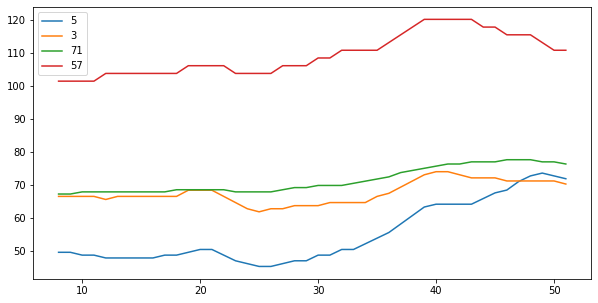

In [32]:
plt.rcParams['figure.figsize']=(10,5)
for seg in [5, 3, 71, 57]:
    plt.plot([8+i for i in range(44)],mean_mat_slot_20_denorm[seg],label=str(seg))
plt.legend()
plt.show()

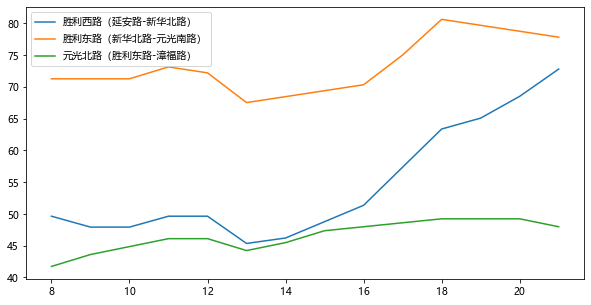

In [20]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['font.sans-serif']=['Microsoft YaHei','SimHei']
mean_mat_slot_20_keys=list(mean_mat_slot_20.keys())
for seg in [5, 297, 3, 43, 34, 138]:
    plt.plot([8+i for i in range(175//12)],mean_mat_slot_20_denorm[seg],label=info[str(seg)][0])
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=None,linkage='complete',affinity='cosine', distance_threshold=0.9,compute_full_tree =True).fit(test)
 clustering.labels_

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(test)
kmeans.labels_
segs=[9, 24, 42, 256, 267, 268, 277]
clusters=[1, 0, 2, 1, 0, 0, 2, 1]
cluster_dict={}
for index,seg in enumerate(segs):
    if clusters[index] not in cluster_dict:
        cluster_dict[clusters[index]]=[]
    cluster_dict[clusters[index]].append(seg)
cluster_dict